Attendance at St. Stephen's College
=========

![Attendance meme](http://cf.chucklesnetwork.com/items/5/7/4/5/9/original/one-does-not-simply-get-perfect-attendance.jpg)
Attendance at SSC was one of my first challenges in College. Now that I'm older and a little wiser, over the past few months something is nagging me while I sleep. I need to see exactly how attendance changes in College.

This notebook follows the three general steps of data analysis:

1. Get the data
    - We make full use of the publicly available data on the college website about student attendance.
2. Clean the data
    - Since the data is in a strange format, we clean it.
3. Nice graphs

Setup
-----

We import some python libraries to help us with this quest.
![xkcd python flying image](https://imgs.xkcd.com/comics/python.png)

In [1]:
import os  # To look around on this computer
import pandas as pd  # DATA management
import requests # Internet requests
import pickle # Saving the raw data
from tqdm import tqdm  # Progress reports
import seaborn as sns  # Plotting
%pylab inline
from itertools import product  # Helper for iterable products

Populating the interactive namespace from numpy and matplotlib


1. Get the data
------

If the data is not available on disk, get it from the Internet

In [2]:
if os.path.exists('sscdata.pickle'):
    with open('sscdata.pickle', 'rb') as fl:
        data = pickle.load(fl)
else:

    base = 'http://sscattendance.formistry.com/report/data/attendance_{}_s{}_{}.json?96894'
    data = {}
    args = list(product(range(1, 34),
                        [1,2,3,4],
                        [8,9,10,1,2]))
    # Get the data form the Internet
    for  course, semester, month in tqdm(args):
        url = base.format(course, semester, month)
        page = requests.get(url)
        if page.status_code == 200:
            data[course, semester, month] = page.json()
    # Save it to disk
    with open('sscdata.pickle', 'wb') as fl:
        pickle.dump(data, fl)

100%|██████████| 660/660 [08:06<00:00,  1.53it/s]


2. Clean the Data
----------------

Clean the obtained raw data. It's in a horrible format. I still don't know why we do this. The college has an awesome Comp Science department. They should do everything!

![data cleaning meme](https://s-media-cache-ak0.pinimg.com/736x/30/66/ac/3066ac69ae68ac200ace0ca8fe3882c3.jpg)

In [244]:
table = []
for key, json in data.items():
    course, sem, month = key
    for person in json['data']:
        pid = person['id']
        d = person['values']
        name = d['name']
        tla = d['Tla']
        tld = d['Tld']
        tpa = d['Tpa']
        tpd = d['Tpd']
        tta = d['Tta']
        ttd = d['Ttd']
        row = (pid, name, course, sem, month, tla, tld, tpa, tpd, tta, ttd)
        table.append(row)

df = pd.DataFrame(table, columns=['pid', 'name', 'course', 'sem', 'month', 'tla', 'tld', 'tpa', 'tpd', 'tta', 'ttd'])

df['percent_la'] = 100 * (df.tla / df.tld)
df['percent_pa'] = 100 * (df.tpa / df.tpd)
df['percent_ta'] = 100 * (df.tta / df.ttd)
df['course'] = df['pid'].str[3:6]
df['month'] = df.month.map({1:'Jan', 8:'July&Aug', 9:'Sep', 10: 'Oct'})
df['admission_year'] = ('20' + df['pid'].str[:2]).astype(int)

df.head()

,pid,name,course,sem,month,tla,tld,tpa,tpd,tta,ttd,percent_la,percent_pa,percent_ta,admission_year
0,16BBAP001,RIYA SINGH,BAP,1,July&Aug,28,78,0,0,3,10,35.897436,NaN,30.000000,2016
1,16BBAP002,SAURAV LOHIA,BAP,1,July&Aug,31,87,0,0,1,8,35.632184,NaN,12.500000,2016
2,16BBAP003,ROBIN SHARMA,BAP,1,July&Aug,13,67,0,0,0,6,19.402985,NaN,0.000000,2016
3,16BBAP005,SATVIK SAHNI,BAP,1,July&Aug,28,94,0,0,1,9,29.787234,NaN,11.111111,2016
4,16BBAP006,AAFREEN SHAH,BAP,1,July&Aug,91,94,0,0,8,8,96.808511,NaN,100.000000,2016


3. Graphs
------

Make as many graphs as sanely possible. Expose the rot of society!

![graphs meme](http://www.mememaker.net/static/images/memes/4222216.jpg)

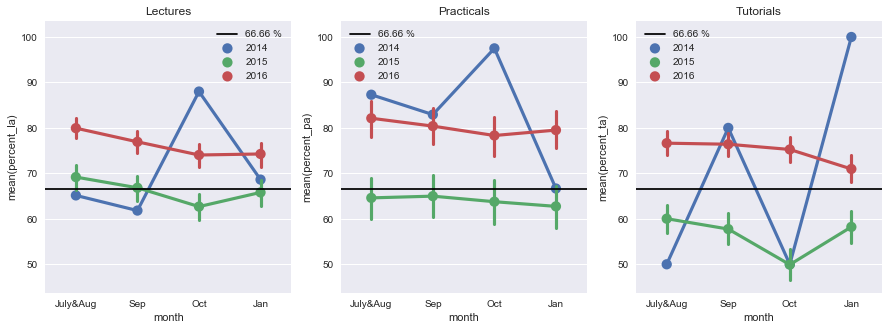

In [245]:
plt.subplots(figsize=(15, 5))
ax1 = plt.subplot(131)
sns.pointplot(x='month', y='percent_la', data=df, hue='admission_year', ax=ax1)
plt.plot([-1,5], [66.66, 66.66], color='black', label='66.66 %')
plt.title('Lectures')
plt.legend()

ax2 = plt.subplot(132, sharey=ax1)
sns.pointplot(x='month', y='percent_pa', data=df, hue='admission_year', ax=ax2)
plt.plot([-1,5], [66.66, 66.66], color='black', label='66.66 %')
plt.title('Practicals')
plt.legend()

ax2 = plt.subplot(133, sharey=ax1)
sns.pointplot(x='month', y='percent_ta', data=df, hue='admission_year', ax=ax2)
plt.plot([-1,5], [66.66, 66.66], color='black', label='66.66 %')
plt.title('Tutorials')
plt.legend()

The third years have attained wisdom as can be seen by them skimming the requirement line. Tut Tut. :D

Practicals see amazingly high attendance in the months where lectures are hardly attended. That's in line with what I remember.

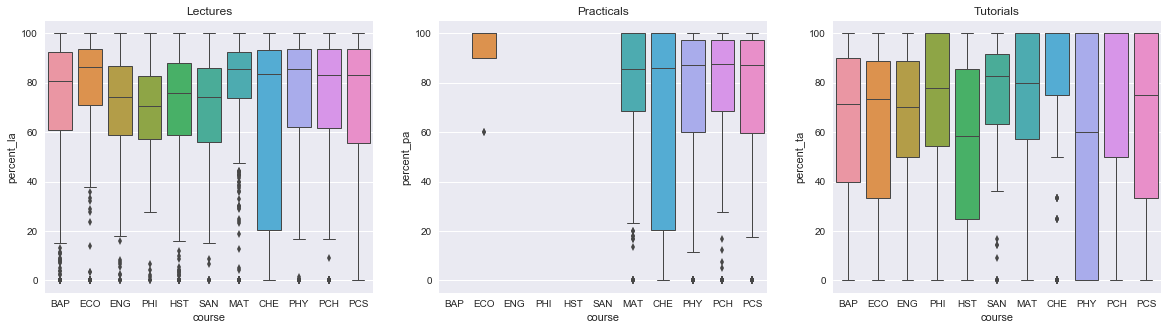

In [246]:
plt.subplots(figsize=(20, 5))
ax1 = plt.subplot(131)
sns.boxplot(x='course', y='percent_la', data=df, linewidth=1, ax=ax1)
plt.title('Lectures')
ax2 = plt.subplot(132, sharey=ax1)
sns.boxplot(x='course', y='percent_pa', data=df, linewidth=1, ax=ax2)
plt.title('Practicals')
ax3 = plt.subplot(133, sharey=ax1)
sns.boxplot(x='course', y='percent_ta', data=df, linewidth=1, ax=ax3)
plt.title('Tutorials')

What is up with Physics Tutorials?! Also, Chem. You people absolutely rock! How the hell does your entire class manage to get that huge quartile?

C:\Users\saga.teja\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 100)

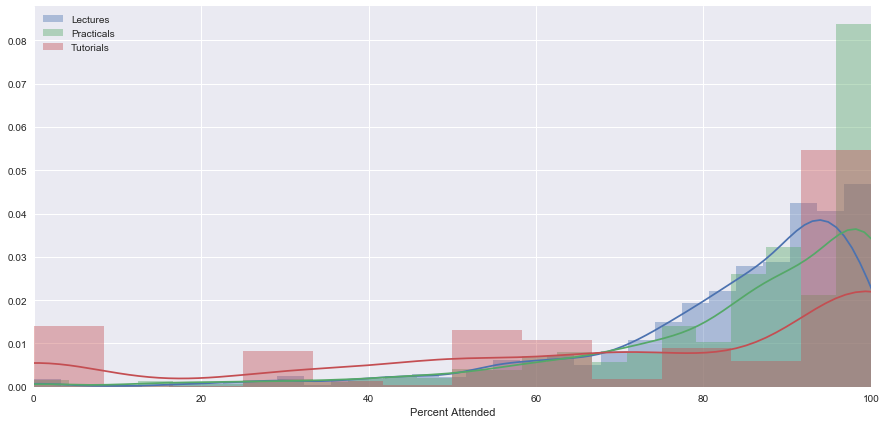

In [247]:
plt.figure(figsize=(15, 7))
sns.distplot(dt.percent_la.dropna(), label='Lectures')
sns.distplot(dt.percent_pa.dropna(), label='Practicals')
sns.distplot(dt.percent_ta.dropna(), label='Tutorials')
plt.legend()
plt.xlabel('Percent Attended')
plt.xlim([0, 100])

All in all, everyone usually does attend college. Seems like I was ont of the people who make up the proud block on the left.

Attendance in college does not really change a lot now does it?

(0, 100)

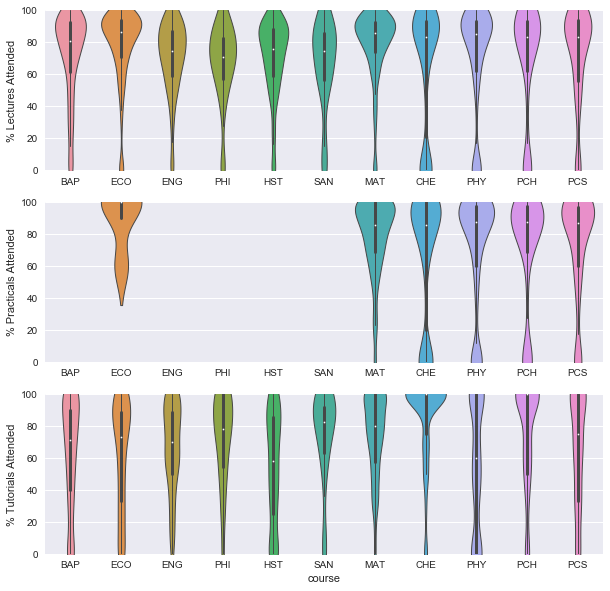

In [263]:
plt.subplots(figsize=(10, 10))
ax1 = plt.subplot(311)
sns.violinplot(x='course', y='percent_la', data=df, ax=ax1, linewidth=1)
plt.ylabel('% Lectures Attended')
plt.xlabel('')
plt.ylim([0,100])

ax2 = plt.subplot(312, sharex=ax1)
sns.violinplot(x='course', y='percent_pa', data=df, ax=ax2, linewidth=1)
plt.ylabel('% Practicals Attended')
plt.xlabel('')
plt.ylim([0,100])

ax3 = plt.subplot(313, sharex=ax1)
sns.violinplot(x='course', y='percent_ta', data=df, ax=ax3, linewidth=1)
plt.ylabel('% Tutorials Attended')
plt.ylim([0, 100])

That explains some things. Chem people have a pretty good presence in the 0 attendance part making their boxplot really long!

Also, they attend Tutorials like bhakts going to a BJP rally. On the other hand, math and Eco people have the largest presence in high attendance of Lectures.

PCS and PCH seem to do almost everything together; but they do differ in tutorial attendance. Leads me to believe that there is some candy being given out in chem tutorials. I should have attended those a little more.